<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/pavelzw/GEFCom14-S-comparison/blob/main/gefcom14-s-deepar.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/pavelzw/GEFCom14-S-comparison/blob/main/gefcom14-s-deepar.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
  <td>
    <a href="https://minhaskamal.github.io/DownGit/#/home?url=https://github.com/pavelzw/GEFCom14-S-comparison/blob/main/gefcom14-s-deepar.ipynb&fileName=gefcom14-s-deepar"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

# Download data

In [ ]:
!echo "Downloading GEFCom14-S..."
!rm -R data > /dev/null
!wget -O gefcom14.zip https://www.dropbox.com/s/pqenrr2mcvl0hk9/GEFCom2014.zip?dl=0
!unzip gefcom14 > /dev/null
!rm gefcom14.zip > /dev/null
!unzip GEFCom2014\ Data/GEFCom2014-S_V2.zip > /dev/null
!rm -R GEFCom2014\ Data > /dev/null
!mv Solar data > /dev/null
!echo "------------------------------"
!echo "Downloaded GEFCom14-S in data/"

rm: cannot remove 'data': No such file or directory
--2021-05-28 16:53:21--  https://www.dropbox.com/s/pqenrr2mcvl0hk9/GEFCom2014.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/pqenrr2mcvl0hk9/GEFCom2014.zip [following]
--2021-05-28 16:53:21--  https://www.dropbox.com/s/raw/pqenrr2mcvl0hk9/GEFCom2014.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc38ed8350b2a3589e1f236daa54.dl.dropboxusercontent.com/cd/0/inline/BPXq3e-xIUE9nZjeypE8tGF1-tKM9f1LaMeLmPVReFk47SFVLLp2iwFsd0FmtxZu9_uRgk3zbtlca0bf4J7SrGAbEMydv2eeuZVgj2yoIV9MlKXYoz68a1Mcom8KfJ-_lmNb4kfyAlo17yDQFe-qaLEN/file# [following]
--2021-05-28 16:53:21--  https://uc38ed8350b2a3589e1f236daa54.dl.dropboxusercontent.com/cd/0/inline/BPXq3e-xIUE9nZjeypE8tGF1-t

# Install pip packages

In [ ]:
!pip install pytorchts
!pip install gluonts

     |████████████████████████████████| 92kB 6.1MB/s 
     |████████████████████████████████| 901kB 13.0MB/s 
     |████████████████████████████████| 1.8MB 22.9MB/s 
     |████████████████████████████████| 10.1MB 39.8MB/s 
     |████████████████████████████████| 133kB 54.4MB/s 
     |████████████████████████████████| 174kB 50.1MB/s 
     |████████████████████████████████| 102kB 14.4MB/s 
     |████████████████████████████████| 71kB 11.6MB/s 
  Created wheel for pytorchts: filename=pytorchts-0.4.0-cp37-none-any.whl size=112176 sha256=844956a905a8f15c0460dfb090283dfa127c556c421606b1f518d31bb82b0d85
  Stored in directory: /root/.cache/pip/wheels/23/c8/33/cdf465c7be65b77ef52aa0601049176326c53e8d4e344f622a
  Created wheel for pathtools: filename=pathtools-0.1.2-cp37-none-any.whl size=8786 sha256=554a7a02be1a72fcbf5ac50c6a886ceb1616295a871c5008ea54d0691ea5dee0
  Stored in directory: /root/.cache/pip/wheels/0b/04/79/c3b0c3a0266a3cb4376da31e5bfe8bba0c489246968a68e843
  Created wheel for subpro

# Select Task

In [ ]:
task = 10

In [ ]:
import pandas as pd

predictors = pd.read_csv(f'data/Task {task}/predictors{task}.csv', parse_dates=['TIMESTAMP'])\
    [['ZONEID', 'TIMESTAMP', 'VAR164', 'VAR169', 'VAR175', 'VAR178', 'VAR228']].set_index('TIMESTAMP')
train = pd.read_csv(f'data/Task {task+1}/train{task+1}.csv', parse_dates=['TIMESTAMP']).set_index('TIMESTAMP')
benchmark = pd.read_csv(f"data/Task {task}/benchmark{'0' + str(task) if task < 10 else task}.csv",
                        parse_dates=['TIMESTAMP']).set_index('TIMESTAMP')

In [ ]:
solar_plants = [train[train['ZONEID'] == i][['POWER']].rename({'POWER': f'ZONEID {i}'}, axis='columns')
                for i in [1,2,3]]
train_data = pd.concat(solar_plants, axis=1)
train_data

,ZONEID 1,ZONEID 2,ZONEID 3
TIMESTAMP,,,
2012-04-01 01:00:00,0.754103,0.647328,0.799000
2012-04-01 02:00:00,0.555000,0.621822,0.817500
2012-04-01 03:00:00,0.438397,0.472692,0.571500
2012-04-01 04:00:00,0.145449,0.098866,0.063775
2012-04-01 05:00:00,0.111987,0.104393,0.103700
...,...,...,...
2014-01-31 20:00:00,0.013077,0.005688,0.019700
2014-01-31 21:00:00,0.069038,0.031397,0.200500
2014-01-31 22:00:00,0.453333,0.105466,0.440400


In [ ]:
def get_predictor_ids():
    return ['VAR169', 'VAR175', 'VAR178', 'VAR228', 'VAR164']
def get_predictor_names(i):
    return [f'SSRD {i}', f'STRD {i}', f'TSR {i}', f'TP {i}', f'TCC {i}']

# add total cloud cover * surface solar radiation predictor
# predictors['VAR164*169'] = predictors['VAR164'] * predictors['VAR169']

In [ ]:
predictors_categories = [predictors[predictors['ZONEID'] == i][get_predictor_ids()]
                             .rename(dict(zip(get_predictor_ids(), get_predictor_names(i))), 
                                     axis='columns')
                         for i in [1,2,3]]
predictor_data = pd.concat(predictors_categories, axis=1)

In [ ]:
for i in range(1, 4):
    for name in get_predictor_names(i):
        predictor_data[name] /= predictor_data[name].max()
predictor_data

,SSRD 1,STRD 1,TSR 1,TP 1,TCC 1,SSRD 2,STRD 2,TSR 2,TP 2,TCC 2,SSRD 3,STRD 3,TSR 3,TP 3,TCC 3
TIMESTAMP,,,,,,,,,,,,,,,
2012-04-01 01:00:00,0.075036,0.035187,0.076927,0.000000,0.244599,0.075329,0.035046,0.077026,0.000000,0.190965,0.075275,0.034431,0.076928,0.000000,0.238145
2012-04-01 02:00:00,0.155907,0.071594,0.159924,0.000000,0.457135,0.156009,0.071159,0.159798,0.000000,0.517131,0.154586,0.069591,0.158553,0.013823,0.561610
2012-04-01 03:00:00,0.230590,0.107719,0.240292,0.028372,0.771424,0.228093,0.107119,0.238421,0.024993,0.705216,0.222792,0.104972,0.233886,0.029863,0.661607
2012-04-01 04:00:00,0.287023,0.144007,0.304604,0.052930,0.965860,0.282115,0.143616,0.300619,0.034330,0.993355,0.277811,0.140904,0.296348,0.037236,0.941552
2012-04-01 05:00:00,0.324356,0.183008,0.352287,0.070487,0.944662,0.320843,0.182606,0.349239,0.041639,0.937597,0.319244,0.178785,0.346746,0.045280,0.944677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-31 20:00:00,0.596699,0.769969,0.646228,0.000000,0.000000,0.583394,0.769728,0.637537,0.000000,0.000000,0.563851,0.758277,0.624909,0.000000,0.000000
2014-01-31 21:00:00,0.615100,0.805719,0.668612,0.000000,0.000000,0.601875,0.805488,0.659994,0.000000,0.000000,0.582429,0.793778,0.647402,0.000000,0.000000
2014-01-31 22:00:00,0.656728,0.842272,0.714429,0.000000,0.000000,0.643529,0.841999,0.705837,0.000000,0.000000,0.624090,0.830155,0.693235,0.000000,0.000000


In [ ]:
# define the parameters of the dataset
gefcom14_metadata = {'num_series': 3,
                     'num_steps': len(predictor_data),
                     'prediction_length': len(benchmark) // 3, # three different timezones
                     'freq': '1H',
                     'start': [pd.Timestamp(predictor_data.index[0], freq='1H') for _ in range(3)]
                     }

In [ ]:
targets = [train_data[:-gefcom14_metadata['prediction_length']][f'ZONEID {i}'].values for i in [1,2,3]]
starts = gefcom14_metadata['start']
features = [predictor_data[:-gefcom14_metadata['prediction_length']][get_predictor_names(i)].values.T for i in [1,2,3]]

In [ ]:
from gluonts.dataset.common import ListDataset
from gluonts.dataset.field_names import FieldName

train_ds = ListDataset([{
    FieldName.TARGET: target,
    FieldName.START: start,
    FieldName.FEAT_DYNAMIC_REAL: fdr,
    FieldName.FEAT_STATIC_CAT: [fsc]
  } for (target, start, fdr, fsc) in zip(targets, starts, features, [1,2,3])], 
  freq=gefcom14_metadata['freq'])

/usr/local/lib/python3.7/dist-packages/gluonts/json.py:46: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  "Using `json`-module for json-handling. "


In [ ]:
len(list(train_ds))

3

In [ ]:
targets = [train_data[f'ZONEID {i}'].values for i in [1,2,3]]
starts = gefcom14_metadata['start']
features = [predictor_data[get_predictor_names(i)].values.T for i in [1,2,3]]

In [ ]:
test_ds = ListDataset([{
    FieldName.TARGET: target,
    FieldName.START: start,
    FieldName.FEAT_DYNAMIC_REAL: fdr,
    FieldName.FEAT_STATIC_CAT: [fsc]
  } for (target, start, fdr, fsc) in zip(targets, starts, features, [1,2,3])], 
  freq=gefcom14_metadata['freq'])

In [ ]:
from gluonts.dataset.multivariate_grouper import MultivariateGrouper

train_grouper = MultivariateGrouper(max_target_dim=3)

test_grouper = MultivariateGrouper(num_test_dates=1, 
                                   max_target_dim=3)

dataset_train = train_grouper(train_ds)
dataset_test = test_grouper(test_ds)

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
# from gluonts.model.deepar import DeepAREstimator
# from gluonts.mx.trainer import Trainer
# from gluonts.mx.distribution import PiecewiseLinearOutput
# 
# estimator = DeepAREstimator(freq=gefcom14_metadata['freq'],
#                             prediction_length=gefcom14_metadata['prediction_length'],
#                             distr_output=PiecewiseLinearOutput(num_pieces=3), # SQF-RNN
#                             use_feat_dynamic_real=True,
#                             trainer=Trainer(epochs=7))

from pts.model.transformer_tempflow import TransformerTempFlowEstimator
from pts import Trainer

# estimator = TransformerTempFlowEstimator(
#     d_model=16,
#     num_heads=4,
#     input_size=5,
#     target_dim=1,
#     prediction_length=gefcom14_metadata['prediction_length'],
#     context_length=gefcom14_metadata['prediction_length']*4,
#     flow_type='MAF',
#     dequantize=True,
#     freq=gefcom14_metadata['freq'],
#     trainer=Trainer(
#         device=device,
#         epochs=14,
#         learning_rate=1e-3,
#         num_batches_per_epoch=100,
#         batch_size=64,
#     )
# )

from pts.model.tempflow import TempFlowEstimator

estimator = TempFlowEstimator(
    target_dim=3,
    prediction_length=gefcom14_metadata['prediction_length'],
    cell_type='GRU',
    input_size=16,
    freq=gefcom14_metadata['freq'],
    scaling=True,
    dequantize=True,
    n_blocks=4,
    trainer=Trainer(device=device,
                    epochs=10, # 45
                    learning_rate=1e-3,
                    num_batches_per_epoch=100,
                    batch_size=64)
)


ensemble_count = 1
predictors = []

for _ in range(ensemble_count):
    predictor = estimator.train(dataset_train)
    predictors.append(predictor)

99it [00:26,  3.74it/s, avg_epoch_loss=6.14, epoch=0]
99it [00:26,  3.77it/s, avg_epoch_loss=5.8, epoch=1]
99it [00:26,  3.73it/s, avg_epoch_loss=5.79, epoch=2]
99it [00:26,  3.75it/s, avg_epoch_loss=5.85, epoch=3]
99it [00:26,  3.76it/s, avg_epoch_loss=5.99, epoch=4]
99it [00:26,  3.77it/s, avg_epoch_loss=5.91, epoch=5]
99it [00:26,  3.73it/s, avg_epoch_loss=5.88, epoch=6]
99it [00:27,  3.67it/s, avg_epoch_loss=5.89, epoch=7]
99it [00:27,  3.63it/s, avg_epoch_loss=5.89, epoch=8]
99it [00:26,  3.68it/s, avg_epoch_loss=5.87, epoch=9]


In [ ]:
from gluonts.evaluation.backtest import make_evaluation_predictions
from tqdm import tqdm

forecast_ensemble = []
tss_ensemble = []

for predictor in tqdm(predictors):
    forecast_it, ts_it = make_evaluation_predictions(
        dataset=dataset_test,  # test dataset
        predictor=predictor,  # predictor
        num_samples=500,  # number of sample paths we want for evaluation
    )

    forecasts = list(forecast_it)
    tss = list(ts_it)
    forecast_ensemble.append(forecasts)
    tss_ensemble.append(tss)

100%|██████████| 1/1 [00:13<00:00, 13.22s/it]


In [ ]:
import matplotlib.pyplot as plt

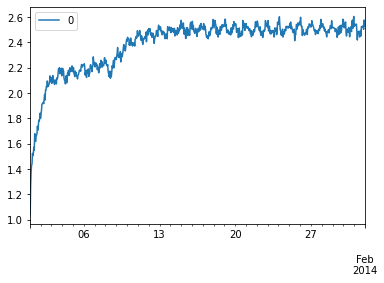

In [42]:
pd.DataFrame(data=forecasts[0].quantile(0.5)[:,0], index=forecasts[0].index).plot()

In [ ]:
tss[0][-24*40:][0]

2013-12-23 01:00:00    0.298013
2013-12-23 02:00:00    0.180449
2013-12-23 03:00:00    0.243718
2013-12-23 04:00:00    0.320385
2013-12-23 05:00:00    0.240833
                         ...   
2014-01-31 20:00:00    0.013077
2014-01-31 21:00:00    0.069038
2014-01-31 22:00:00    0.453333
2014-01-31 23:00:00    0.622372
2014-02-01 00:00:00    0.720000
Freq: H, Name: 0, Length: 960, dtype: float32

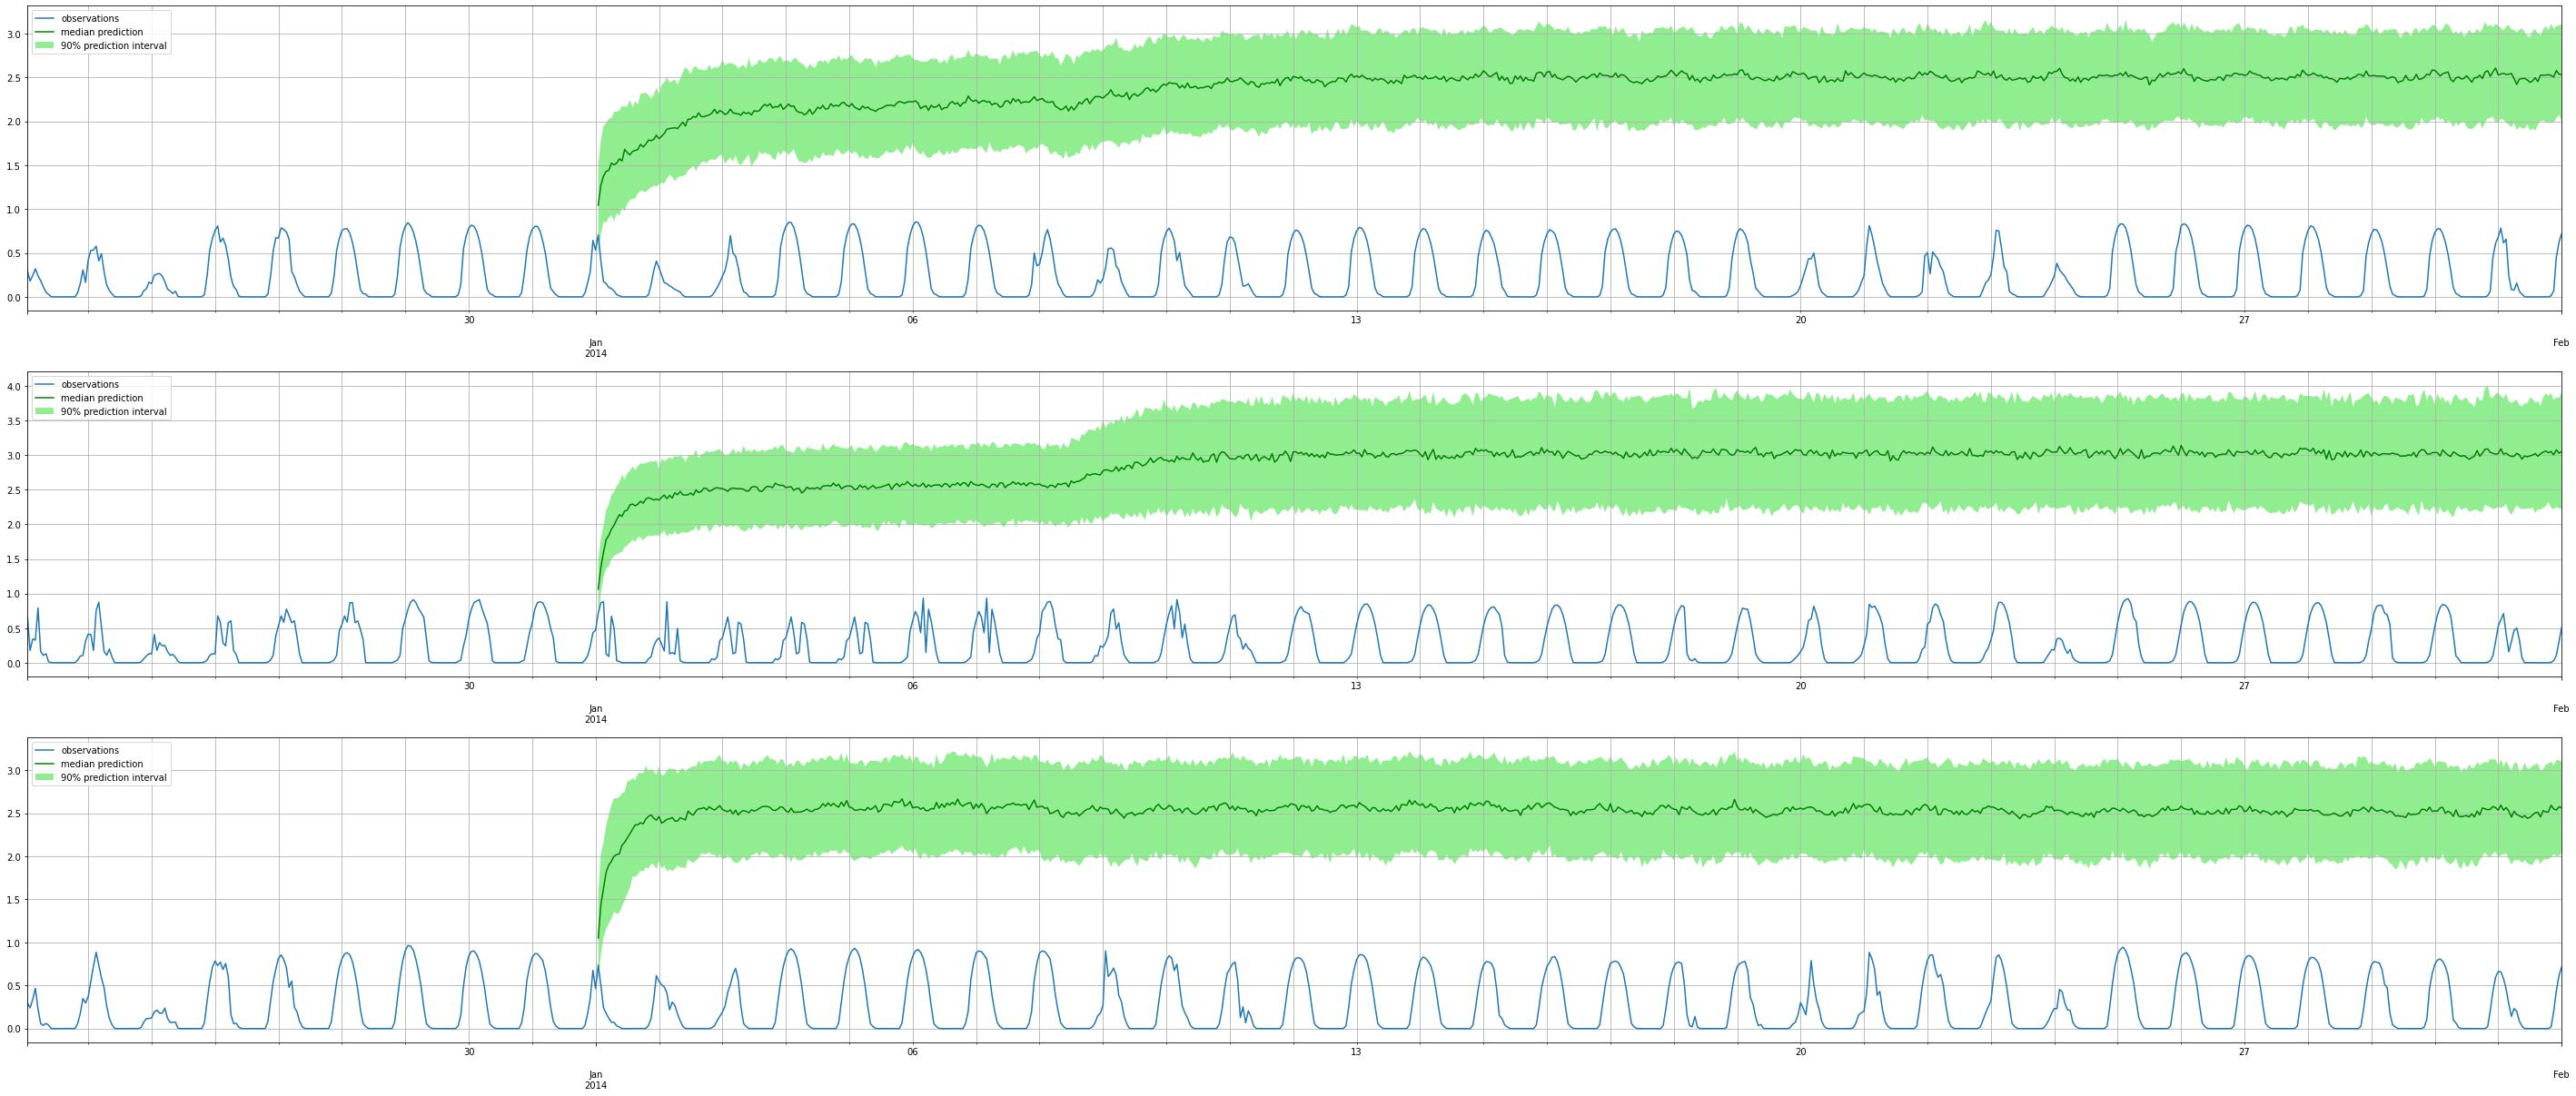

In [60]:
def plot_prob_forecasts(ts_entry, forecast_entry, output_file=None):
    plot_length = 24 * 40
    prediction_intervals = (50, 90)
    legend = ["observations", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

    fig, axes = plt.subplots(3, 1, figsize=(50, 21))
    for i, ax in enumerate(axes):
        ts_entry[-plot_length:][i].plot(ax=ax)  # plot the time series
        
        for p in prediction_intervals:
            if p != 50:
                ax.fill_between(forecast_entry.index, forecast_entry.quantile(p/100)[:,i], forecast_entry.quantile(1-p/100)[:,i], facecolor='lightgreen')
            else:
                pd.DataFrame(data=forecast_entry.quantile(p/100)[:,i], index=forecast_entry.index).plot(color='g', ax=ax)
        ax.grid(which="both")
        ax.legend(legend, loc="upper left")
    if output_file is not None:
        plt.savefig(output_file)
    plt.show()

plot_prob_forecasts(tss[0], forecasts[0])

In [63]:
import numpy as np

prediction_ensemble = []

for forecasts in forecast_ensemble:
    zone_predictions = []
    for i, forecast in enumerate(forecasts):
        prediction = pd.concat([np.maximum(forecast.quantile_ts(p/100), 0)
                                for p in range(1, 100)], axis=1)\
            .rename(columns={p: str((p+1)/100) for p in range(99)})
        prediction.insert(0, 'ZONEID', i+1)
        prediction.index.name = 'TIMESTAMP'
        zone_predictions.append(prediction)

    predictions = pd.concat(zone_predictions)
    prediction_ensemble.append(predictions)

Exception: ignored

In [ ]:
!mkdir -p results

In [ ]:
averaged_predictions = pd.DataFrame()

for p in range(1, 100):
    quantile_columns = [prediction[str(p/100)] for prediction in prediction_ensemble]
    averaged_predictions.insert(p-1, str(p/100), np.mean(quantile_columns, axis=0))

averaged_predictions.insert(0, 'ZONEID', np.array(prediction_ensemble[0]['ZONEID']))
averaged_predictions.insert(0, 'TIMESTAMP', prediction_ensemble[0].index)
averaged_predictions = averaged_predictions.set_index('TIMESTAMP')
    
averaged_predictions.to_csv(f'results/prediction_sqf_rnn_task{task}.csv')

averaged_predictions

,ZONEID,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.3,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,...,0.6,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.7,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.8,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-01-01 01:00:00,1,0.375324,0.379865,0.384160,0.387914,0.392484,0.396900,0.401567,0.406040,0.411529,0.415139,0.420705,0.423315,0.428188,0.432715,0.438342,0.442277,0.447235,0.453049,0.459288,0.463920,0.467097,0.470540,0.474969,0.478117,0.482642,0.486718,0.488574,0.491669,0.494635,0.496950,0.499497,0.501829,0.503613,0.505772,0.508460,0.510583,0.513291,0.514789,0.517188,...,0.569862,0.572622,0.575811,0.578785,0.582472,0.585774,0.589268,0.592227,0.595173,0.598009,0.601701,0.605546,0.610069,0.614048,0.617236,0.621355,0.625892,0.629039,0.632674,0.636807,0.640215,0.644318,0.648222,0.653838,0.657559,0.662553,0.666100,0.668425,0.672394,0.676097,0.680090,0.684744,0.689922,0.692952,0.697750,0.701622,0.705061,0.707813,0.712501,0.716748
2014-01-01 02:00:00,1,0.258903,0.290137,0.299859,0.308960,0.315936,0.325389,0.332532,0.339909,0.346309,0.354090,0.357973,0.364518,0.371215,0.376959,0.384234,0.389613,0.395185,0.398946,0.404593,0.408359,0.411922,0.416630,0.419823,0.423983,0.427830,0.431338,0.435839,0.439403,0.442713,0.446434,0.449734,0.452302,0.454863,0.457433,0.460521,0.464636,0.467076,0.470444,0.473322,...,0.541334,0.544073,0.548065,0.550852,0.554816,0.558957,0.562989,0.566918,0.571083,0.575675,0.578760,0.582902,0.586743,0.591667,0.595661,0.599178,0.601765,0.605495,0.610327,0.615286,0.619346,0.623772,0.628695,0.633873,0.638378,0.642588,0.649093,0.655912,0.660900,0.667916,0.674049,0.679467,0.689486,0.698247,0.704738,0.713421,0.726347,0.739056,0.753124,0.775258
2014-01-01 03:00:00,1,0.158201,0.182702,0.196694,0.211037,0.224187,0.232703,0.239442,0.248279,0.254092,0.259584,0.267133,0.273965,0.279661,0.285154,0.291045,0.298366,0.303922,0.309161,0.313782,0.318255,0.323698,0.329486,0.334388,0.340036,0.345077,0.350743,0.354910,0.358671,0.362505,0.367373,0.371903,0.375026,0.379400,0.384029,0.389253,0.392783,0.395502,0.399614,0.403769,...,0.476019,0.479829,0.483367,0.486534,0.490535,0.493676,0.497582,0.501474,0.505314,0.510012,0.514805,0.519384,0.522917,0.528031,0.532838,0.535723,0.538792,0.543086,0.548162,0.551480,0.558987,0.563209,0.569139,0.573398,0.577620,0.582592,0.587155,0.594168,0.599979,0.606722,0.612815,0.621979,0.629765,0.638488,0.650915,0.660607,0.671620,0.685200,0.702773,0.729524
2014-01-01 04:00:00,1,0.079635,0.106906,0.125601,0.137396,0.148378,0.157572,0.167014,0.176758,0.184425,0.190529,0.197706,0.203542,0.207927,0.214110,0.218224,0.223975,0.229843,0.235218,0.238988,0.244305,0.249769,0.253791,0.258244,0.262526,0.266101,0.269418,0.272320,0.276335,0.279595,0.282313,0.286025,0.289466,0.293239,0.296816,0.301622,0.305134,0.308258,0.312079,0.316473,...,0.386630,0.391327,0.395165,0.400908,0.406500,0.409477,0.414635,0.418596,0.421557,0.424825,0.430015,0.433348,0.436504,0.439862,0.444911,0.449105,0.452799,0.455603,0.459978,0.464463,0.469405,0.473872,0.477919,0.484313,0.490351,0.494954,0.500006,0.507171,0.513010,0.520123,0.526298,0.533690,0.541916,0.549246,0.559033,0.567724,0.576349,0.588149,0.602125,0.627625
2014-01-01 05:00:00,1,0.030527,0.042775,0.056132,0.069335,0.078706,0.086581,0.090757,0.097354,0.103031,0.108255,0.113248,0.118482,0.122552,0.128196,0.132189,0.137156,0.141261,0.144899,0.148610,0.152670,0.155146,0.158812,0.163699,0.166664,0.170534,0.174164,0.177717,0.180904,0.184254,0.187671,0.190704,0.193689,0.197849,0.201002,0.204565,0.208006,0.210508,0.213638,0.215453,...,0.278067,0.280912,0.283325,0.286167,0.288799,0.291980,0.294662,0.297017,0.300669,0.304403,0.306927,0.309484,0.313158,0.315956,0.319798,0.323406,0.326706,0.329924,0.333768,0.337859,0.34

## Plotting the quantile prediction for the first entries

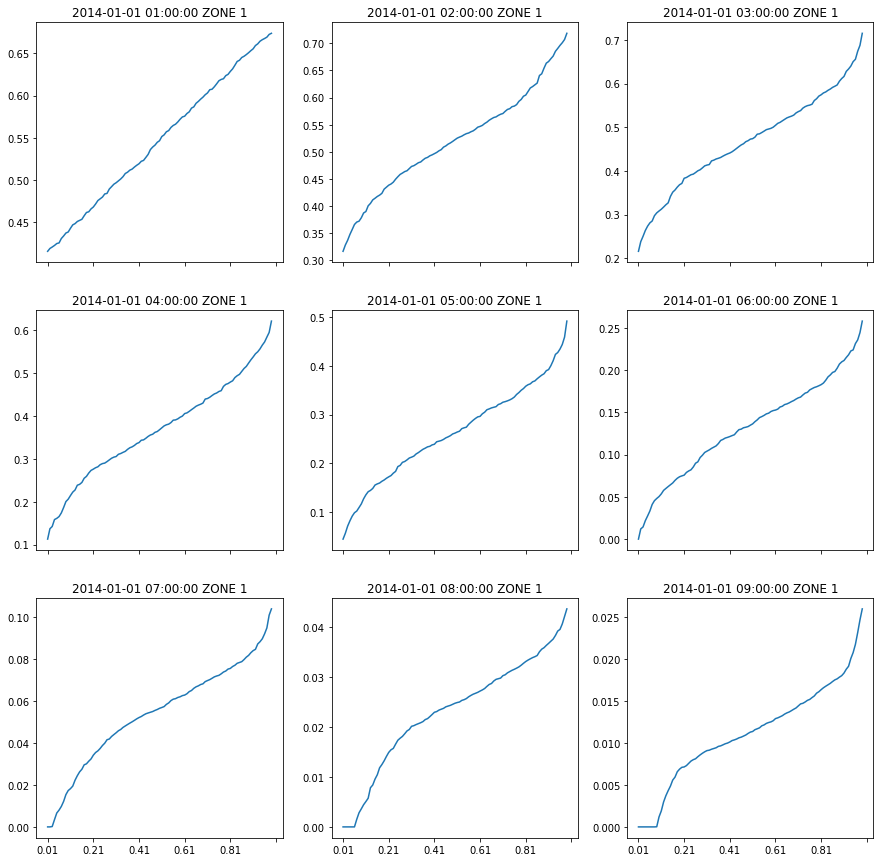

In [ ]:
fig, ax = plt.subplots(3, 3, sharex=True, figsize=(15, 15))

for i in range(9):
    predictions.iloc[i].tail(99).plot(ax=ax[i // 3, i % 3], 
                                      title=str(predictions.index[i]) + ' ZONE ' 
                                      + str(int(predictions.iloc[i]['ZONEID'])))

# Evaluate Loss

The loss function is the pinnball loss: 
$$ L(q_a, y) = \begin{cases}
    (1-\frac{a}{100})(q_a - y), &\text{if } y < q_a \\
    \frac{a}{100}(y-q_a), &\text{if } y \geq q_a.
\end{cases} $$

The score is then averaged over all target quantiles for all time periods over the forecast horizon and for all zones.

In [ ]:
def pinnball_loss(actual, prediction):
    actual = actual[...,None]

    percentiles = np.empty((actual.shape[0], 99))
    for i in range(1, 100):
        percentiles[:, i-1] = i
    loss = np.where(actual < prediction, 
                    (1 - percentiles / 100) * (prediction - actual), 
                    percentiles / 100 * (actual - prediction))
    return loss

loss1 = np.mean(pinnball_loss(tss[0].values[-gefcom14_metadata['prediction_length']:,0], predictions[predictions['ZONEID'] == 1].drop('ZONEID', axis=1)))
loss2 = np.mean(pinnball_loss(tss[1].values[-gefcom14_metadata['prediction_length']:,0], predictions[predictions['ZONEID'] == 2].drop('ZONEID', axis=1)))
loss3 = np.mean(pinnball_loss(tss[2].values[-gefcom14_metadata['prediction_length']:,0], predictions[predictions['ZONEID'] == 3].drop('ZONEID', axis=1)))

print(f"Loss of task {task}: {round((loss1 + loss2 + loss3) / 3, 5)}")

Loss of task 10: 0.01959


In [ ]:
loss1 = np.mean(pinnball_loss(tss[0].values[-gefcom14_metadata['prediction_length']:,0], benchmark[benchmark['ZONEID'] == 1].drop('ZONEID', axis=1)))
loss2 = np.mean(pinnball_loss(tss[1].values[-gefcom14_metadata['prediction_length']:,0], benchmark[benchmark['ZONEID'] == 2].drop('ZONEID', axis=1)))
loss3 = np.mean(pinnball_loss(tss[2].values[-gefcom14_metadata['prediction_length']:,0], benchmark[benchmark['ZONEID'] == 3].drop('ZONEID', axis=1)))

print(f"Benchmark loss of task {task}: {round((loss1 + loss2 + loss3) / 3, 5)}")

Benchmark loss of task 10: 0.04212
